### Correspondence Analysis Assignment 

Jay Urbain, PhD

Objectives:    
- Students can explain factor analysis

- Students understand how factor analysis differs from PCA and ICA

- Students can identify common use cases for factor analysis

- **Students can apply factor analysis to an appropriate dataset (i.e. purely quantitative)**

- **Students can explain dimensionality reduction techniques for categorical (MCA) and mixed (FAMD) data**

- **Students can apply MCA and FAMD to appropriate datasets**

References

- Phillip M. Yelland, An Introduction to Correspondence Analysis, The Mathematical Journal, Volume 12   
https://www.mathematica-journal.com/2010/09/an-introduction-to-correspondence-analysis/

- Theory of Correspondence  Analysis  
http://statmath.wu.ac.at/courses/CAandRelMeth/caipA.pdf

-  Dr J Maiti, IIT Kharagpur, Mod-01 Lec-41 Correspondence Analysis  
https://www.youtube.com/watch?v=jr47E7MZfwY

- Wikipedia - Correspondence Analysis  
https://en.wikipedia.org/wiki/Correspondence_analysis

- Wikipedia - Multiple Correspondence Analysis    
https://en.wikipedia.org/wiki/Multiple_correspondence_analysis

- Wikipedia Factor Analysis of Mixed Data     
https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data

- Prince factor analysis library   
https://github.com/MaxHalford/prince

- Elena, Introduction to Correspondence Analysis    
https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/



### Correspondence Analysis

Correspondence analysis (CA) is a data analysis technique for nominal (categorical) data. 

CA is used to detect and represent underlying structures using cross tabulations of a data set. It does this by representing data as points in a low-dimensional Euclidean space. 

CA is conceptually similar to principal component analysis, but applies to categorical rather than continuous data.

MCA can be viewed as an extension of simple correspondence analysis (CA) in that it is applicable to a large set of categorical variables.

CA and MCA provide a means of displaying or summarising a set of data in two-dimensional graphical form.


### Introduction

CA essentially provides a graphical representation of cross tabulations (cross tabs, or contingency tables). 

A contingency table is a tabulation of frequencies of how categorical values are distributed by variables. 

Cross tabulations arise whenever it is possible to place events into two or more different sets of categories, such as product and location for purchases in market research or symptom and treatment in medical testing. 

An introduction to correspondence analysis is provided in the form of an exercise in textual analysis—identifying the author of a text based on examination of its characters (from Yelland). 


In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import itertools

from scipy.stats import chi2_contingency

import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt


Sample dataset

Consider the following list of seventeenth- and eighteenth-century writers.


In [0]:
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [3]:
authorSamples = list(itertools.chain.from_iterable([[a+": "+str(i) for i in [1,2,3]] for a in authors]))
authorSamples

['Charles Darwin: 1',
 'Charles Darwin: 2',
 'Charles Darwin: 3',
 'Rene Descartes: 1',
 'Rene Descartes: 2',
 'Rene Descartes: 3',
 'Thomas Hobbes: 1',
 'Thomas Hobbes: 2',
 'Thomas Hobbes: 3',
 'Mary Shelley: 1',
 'Mary Shelley: 2',
 'Mary Shelley: 3',
 'Mark Twain: 1',
 'Mark Twain: 2',
 'Mark Twain: 3']

The contingency table built from how often these letters appear in three passages per author are shown below. 

Where rows=authors, and columns=characters.

A contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. 

For example, 'Charles Darwin: 1' uses the character "B" 34 times. 'Mark Twain: 3' uses the character "C" 17 times.

In [0]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [0]:
dfTableForm = pd.DataFrame(data=np.transpose(sampleCrosstab), columns=authorSamples)

In [6]:
dfTableForm.head()

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
0,34,18,32,13,8,9,15,18,19,13,17,13,16,15,19
1,37,33,43,31,28,34,20,14,18,29,34,22,18,21,17
2,44,47,36,55,34,43,28,40,41,49,43,43,56,66,70
3,27,24,12,29,24,25,18,25,26,31,29,16,13,21,12
4,19,14,21,15,17,18,19,21,19,16,14,11,27,19,28


Can you spot patterns in the use of letters by author in the cross tab?

Very difficult, so CA uses the $\chi^2$ statistic.



### Chi-Squared Statistic and Chi-Squared Distances

Pearson's chi-squared test ($\chi^2$) is a independence test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance. 

The $\chi^2$  test we can be used to say with reasonable certainty if the distribution of letters differs from one author to another. $\chi^2$  is defined as.

$$
\chi^2 = \sum_I \sum_J \dfrac{\left(n_{ij} - \left(\dfrac{n_i n_j}{n}\right)\right)^2}  {\dfrac{n_i n_j}{n}}
$$

Where $n$ is the total number of frequencies, $n_{ij}$  is the letter frequency in row $i$  and column $j$ , and $n_{i}$  and $n_{j}$  are the total frequencies in row $i$  and column $j$  respectively. 

The product of $n_{i}$  and $n_{j}$ are normalized by $n$ is the expected frequency for $n_{ij}$  under the independence assumption. This is called the  `independence model`. 

The greater the value for $\chi^2$, the greater is the certainty that the use of these letters is different by author. 


#### Calculate Chi-Squared Statistic


In [7]:
grandTotal = np.sum(sampleCrosstab)
print('grandTotal', grandTotal)

correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
print('correspondenceMatrix', correspondenceMatrix)

rowTotals = np.sum(correspondenceMatrix, axis=1)
print('rowTotals', rowTotals)

columnTotals = np.sum(correspondenceMatrix, axis=0)
print('columnTotals', columnTotals)

grandTotal 8994
correspondenceMatrix [[0.0037803  0.00411385 0.00489215 0.003002   0.00211252 0.00433622
  0.00822771 0.00489215 0.003002   0.0067823  0.00133422 0.00722704
  0.00767178 0.00244608 0.00155659 0.00233489]
 [0.00200133 0.00366911 0.00522571 0.00266845 0.00155659 0.00422504
  0.00733823 0.00455859 0.00400267 0.00800534 0.00166778 0.00689348
  0.00700467 0.00344674 0.00133422 0.00200133]
 [0.00355793 0.00478097 0.00400267 0.00133422 0.00233489 0.00567045
  0.00833889 0.00366911 0.00255726 0.00667111 0.00266845 0.0075606
  0.00945074 0.00200133 0.00144541 0.00155659]
 [0.00144541 0.00344674 0.00611519 0.00322437 0.00166778 0.00689348
  0.00822771 0.00478097 0.00311319 0.00811652 0.00088948 0.00655993
  0.006004   0.00355793 0.00211252 0.0022237 ]
 [0.00088948 0.00311319 0.0037803  0.00266845 0.00189015 0.0075606
  0.00833889 0.0037803  0.00277963 0.00778297 0.00177896 0.00622637
  0.00800534 0.00344674 0.00155659 0.00122304]
 [0.00100067 0.0037803  0.00478097 0.00277963 0.00

In [0]:
# Compute the outer product of two vectors.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html

independenceModel = np.outer(rowTotals, columnTotals)

In [9]:
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)

448.49666422103445


In [10]:
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

448.49666422103445
0.0


#### Calculating Chi-Squared Distances

The correspondenceMatrix holds normalized frequencies. 

The $\chi^2$ statistic is $448.50$ for the contigency table, which is very unlikely to be observed under the null hypothesis (that the letter frequencies follow the same distribution). 

Having established this, we can continue with the CA as we now know that it should be able to show us some meaningful associations.

For the purposes of CA, the differences between the distributions of letters in the text samples are measured by $\chi^2$ distances, which are weighted Euclidean distances between normalized rows. 

These are calculated by dividing row entries by their respective row totals. The weights are inversely proportional to the square roots of the column totals. 

$\chi^2$-distances between row $i$ and row $k$ are defined as:

$$
\chi_{distance_{ik}}^2 = \sqrt{\sum_J \dfrac{ (p_{ij}/p_i - p_{kj}/p_k)^2} {p_j} }
$$

In [0]:
# pre-calculate normalised rows
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])

In [0]:
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))

norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                -norm_correspondenceMatrix[row])/columnTotals, axis=1))

In [0]:
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int), columns=authorSamples)

In [14]:
dfchiSquaredDistances

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
0,0,21,24,29,35,33,36,39,34,27,31,38,43,38,42
1,21,0,32,20,26,24,32,33,28,23,26,31,40,33,41
2,24,32,0,40,34,35,37,39,35,37,29,37,46,48,47
3,29,20,40,0,22,21,29,33,30,15,29,32,32,26,35
4,35,26,34,22,0,16,23,28,26,24,24,30,37,38,41
5,33,24,35,21,16,0,26,27,24,19,22,31,42,41,43
6,36,32,37,29,23,26,0,25,24,26,33,34,35,37,36
7,39,33,39,33,28,27,25,0,8,29,26,35,39,41,37
8,34,28,35,30,26,24,24,8,0,26,23,33,40,41,39
9,27,23,37,15,24,19,26,29,26,0,23,27,35,29,36


#### Chi-Squared Distances in Graphical Form

CA provides a means of representing a table of $\chi^2$-distances in a graphical form. This is where the similarity with the PCA analysis comes in. 

To calculate such representation we need to transform the distances to points in a Cartesian coordinate system. This is achieved by a singular value decomposition (SVD) of a matrix of standardized residuals.

$$
\Omega = \frac{p_{ij}-\mu_{ij}}{\sqrt{\mu_{ij}}}  
$$

In [0]:
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),
                                  np.sqrt(independenceModel))

In [0]:

u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

In [0]:
u,s,vh

#### Calculating Row Scores

We are after the row scores, which are coordinates of points in a high-dimensional space (14 dimensions in this case). 

These points are arranged so that the Euclidean distance between two points is equal to the $\chi^2$-distance between the two rows to which they correspond. The row scores are defined as:

$$R = \delta_{r}\cdot U\cdot S $$

where $U$ and $S$ are the left singular vectors matrix and singular values on the diagonal matrix from SVD. The $\delta_{r}$  is diagonal matrix made of the reciprocals of the square roots of the row totals.


In [0]:
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))

In [0]:
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))

In [0]:
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], 
                                    columns=['X', 'Y'], index=initials)

Extracting the first two components

In [21]:
dfFirstTwoComponents

,X,Y
CD1,-0.070977,0.200620
CD2,-0.062109,0.094512
CD3,-0.148509,0.158889
RD1,0.030697,0.019028
RD2,-0.069552,-0.068382
RD3,-0.115119,-0.063805
TB1,-0.006890,-0.103594
TB2,-0.053382,-0.170423
TB3,-0.083822,-0.121758
MS1,-0.016408,0.001383


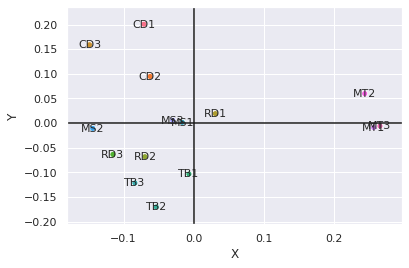

In [22]:
ax = sns.scatterplot(data=dfFirstTwoComponents,x='X', y='Y', hue=initials)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)

for label in initials:
    plt.annotate(label, 
                 (dfFirstTwoComponents.loc[label,:]['X'],
                  dfFirstTwoComponents.loc[label,:]['Y']),
                 horizontalalignment='center', verticalalignment='center',size=11)

The plot clearly shows letters associations by author. Mark Twain and Charles Darwin’s samples stand out as significantly different from the rest.

### Prince

Prince is a library for doing factor analysis. This includes a variety of methods including principal component analysis (PCA) and correspondence analysis (CA), multiple correspondence analysis (MCA), multiple factor analyis (MFA), and Factor analysis of mixed data (FAMD). 

The goal of the Prince library is to provide an efficient implementation for each algorithm along with a scikit-learn API.

Each estimator provided by prince extends scikit-learn's `TransformerMixin`. This means that each estimator implements a fit and a transform method which makes them usable in a transformation pipeline. 

Prince uses a randomised version of `SVD` for all methods. So if you want reproducible results then you should set the random_state parameter.

Because each of Prince's algorithms use SVD, they all possess a `n_iter` parameter which controls the number of iterations used for computing the `SVD`. The higher `n_iter` is the more precise the results will be. On the other hand increasing `n_iter` increases the computation time. In general the algorithm converges very quickly so using a low `n_iter` (which is the default behaviour) is recommended.

https://github.com/MaxHalford/prince

Installation:

pip install prince  # doctest: +SKIP

### Correspondence analysis (CA) with Prince

You should be using correspondence analysis to analyse the dependencies between two categorical variables in the form of a contingency table. 

The following example comes from section 17.2.3 of *Theory of Correspondence Analysis* (references at the top of the notebook). It shows the number of occurrences between different hair and eye colors.

In [25]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
X = pd.DataFrame(
    data=[
        [326, 38, 241, 110, 3],
        [688, 116, 584, 188, 4],
        [343, 84, 909, 412, 26],
        [98, 48, 403, 681, 85]
    ],
    columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
    index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
 )
X

,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


Unlike the PCA class, the CA only exposes scikit-learn's fit method.

In [26]:
!pip install prince

In [0]:
import prince
ca = prince.CA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
ca = ca.fit(X)

In [28]:
ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


In [29]:
ca.column_coordinates(X)

,0,1
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


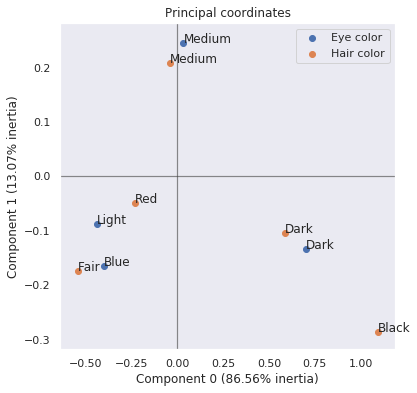

In [30]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
)
ax.get_figure().savefig('ca_coordinates.svg')

Like for the PCA you can access the inertia contribution of each principal component as well as the eigenvalues and the total inertia

In [31]:
ca.eigenvalues_

[0.19924475202819097, 0.030086774100411807]

In [32]:
ca.total_inertia_

0.23019100748666482

In [33]:
ca.explained_inertia_

[0.8655627090025808, 0.13070351630549581]

### Assignment Part 1:

1) Reproduce the results from textual analysis—identifying the author of a text based on examination of its characteristics earlier in the notebook. Use `n_components=2`.

2) After plotting both sets of principal coordinates with the plot_coordinates method, record your observations.

#### Instantiate a `prince` object and fit the data in `dfTableForm`

Use the following parmaeters:

```
n_components=2
n_iter=3
copy=True
engine='auto'
```

In [0]:
import prince
ca = prince.CA(n_components=2,
               n_iter=3, 
               copy=True,
               engine='auto')

X = dfTableForm
ca = ca.fit(X)

In [38]:
ca.row_coordinates(X)

,0,1
0,-0.067801,0.251874
1,-0.186781,0.206641
2,0.189076,0.045753
3,-0.132993,-0.046796
4,0.142068,-0.028568
5,-0.004141,-0.123746
6,-0.037227,-0.017651
7,0.150109,0.174766
8,-0.101342,-0.086505
9,-0.014181,-0.090968


In [39]:
ca.column_coordinates(X)

,0,1
Charles Darwin: 1,-0.070977,0.200620
Charles Darwin: 2,-0.062109,0.094512
Charles Darwin: 3,-0.148509,0.158889
Rene Descartes: 1,0.030697,0.019028
Rene Descartes: 2,-0.069552,-0.068382
Rene Descartes: 3,-0.115119,-0.063805
Thomas Hobbes: 1,-0.006890,-0.103594
Thomas Hobbes: 2,-0.053382,-0.170423
Thomas Hobbes: 3,-0.083822,-0.121758
Mary Shelley: 1,-0.016408,0.001383


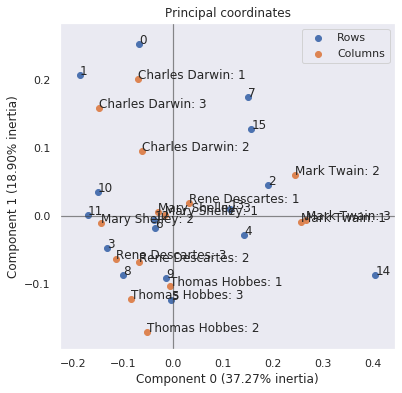

In [40]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
)
ax.get_figure().savefig('ca_coordinates.svg')

### Multiple correspondence analysis (MCA)

Multiple correspondence analysis (MCA) is an extension of correspondence analysis (CA). It should be used when you have more than two categorical variables. 

The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it. 

A one-hot encoded table is also called
MCA is performed by applying the CA algorithm to either an indicator matrix (also called complete disjunctive table – CDT) or a Burt table formed from these variables.

An [indicator matrix](https://www.xlstat.com/en/solutions/features/complete-disjuncive-tables-creating-dummy-variables) is an individuals × variables matrix, where the rows represent individuals and the columns are dummy variables representing categories of the variables (essentially one-hot encoded). Analyzing the indicator matrix allows the direct representation of individuals as points in geometric space. 

The [Burt table](https://documentation.statsoft.com/STATISTICAHelp.aspx?path=Glossary/GlossaryTwo/B/BurtTables) is the symmetric matrix of all two-way cross-tabulations between the categorical variables, and has an analogy to the covariance matrix of continuous variables. 

Analyzing the Burt table is a more natural generalization of simple correspondence analysis, and individuals or the means of groups of individuals can be added as supplementary points to the graphical display.

The Prince library takes a category table as shown below and handles these table representations automatically.

The example below uses the balloons dataset taken from the UCI datasets website.

In [41]:
import pandas as pd

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
X.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


The MCA also implements the fit and transform methods.

#### Instantiate a `prince` object and fit the data in `X`

Use the following parmaeters:

```
n_components=2
n_iter=3
copy=True
engine='auto'
```

In [0]:
import warnings
warnings.filterwarnings('ignore')

import prince
mca = prince.MCA(n_components = 2,
                 n_iter = 3,
                 copy = True,
                 engine ='auto')

mca = mca.fit(X)

Like the CA class, the MCA class also has plot_coordinates method.

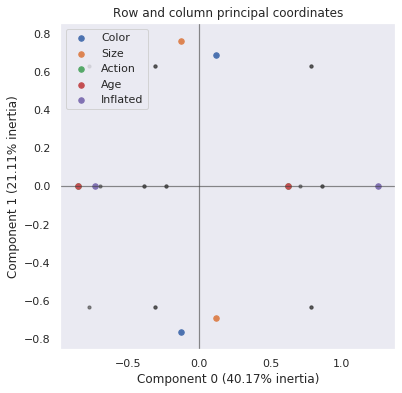

In [44]:
ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
)
ax.get_figure().savefig('mca_coordinates.svg')

Percentage of variance explained by an Eigenvector is also referred as its inertia.

In [45]:
mca.eigenvalues_

[0.4016565656013382, 0.2111111111111114]

In [46]:
mca.total_inertia_

1.0

In [47]:
mca.explained_inertia_

[0.4016565656013382, 0.2111111111111114]

### Factor analysis of mixed data (FAMD)

When data include both numeric and categorical variables _and_ the active variables are homogeneous, i.e, there is no dependence between numeric and categorical variables, PCA or MCA can be used.

When the active variables are mixed, the usual practice is to perform discretization on the quantitative variables (e.g. usually in surveys the age is transformed into age classes). Data thus obtained can be processed by MCA.

This practice reaches its limits:  

- When there are few individuals ( less than a hundred to fix ideas ) in which case the MCA is unstable.

- When there are few qualitative variables with respect to quantitative variables (one can be reluctant to discretize twenty quantitative variables to take into account a single qualitative variable).

#### FAMD criteria:

The data include ${\displaystyle K}$ quantitative variables ${\displaystyle {k=1,\dots ,K}}$; and ${\displaystyle Q}$ qualitative variables ${\displaystyle {q=1,\dots ,Q}}$ .

If ${\displaystyle z}$ is a quantitative variable:

- ${\displaystyle r(z,k)}$ the correlation coefficient between variables ${\displaystyle k}$ and ${\displaystyle z}$ 

- ${\displaystyle \eta ^{2}(z,q)}$ the squared correlation ratio between variables ${\displaystyle z}$ and ${\displaystyle q}$ .

In the PCA of ${\displaystyle K}$, we look for the function on ${\displaystyle I}$ (a function on ${\displaystyle I}$ assigns a value to each individual, it is the case for initial variables and principal components) the most correlated to all ${\displaystyle K}$ variables in the following sense:

${\displaystyle \sum _{k}r^{2}(z,k)}$ maximum.

In MCA of $Q$, we look for the function on ${\displaystyle I}$ more related to all ${\displaystyle Q}$ variables in the following sense:

${\displaystyle \sum _{q}\eta ^{2}(z,q)}$ maximum.

In FAMD ${\displaystyle \{K,Q\}}$, we look for the function on ${\displaystyle I}$ the more related to all ${\displaystyle K+Q}$ variables in the following sense:

${\displaystyle \sum _{k}r^{2}(z,k)+\sum _{q}\eta ^{2}(z,q)}$ maximum.

In this criterion, both types of variables play the same role. The contribution of each variable in this criterion is bounded by 1.



In [0]:
import pandas as pd

X = pd.DataFrame(
    data=[
         ['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
         ['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
         ['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
         ['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
         ['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
         ['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]

Now we can fit an FAMD.

In [0]:
import prince
famd = prince.FAMD(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
famd = famd.fit(X.drop('Oak type', axis='columns'))  # No need for 'Oak type'

The FAMD inherits from the MFA class, which entails that you have access to all it's methods and properties. The row_coordinates method will return the global coordinates of each wine.

In [50]:
famd.row_coordinates(X)

,0,1
Wine 1,3.351475,4.278852
Wine 2,3.396873,4.135743
Wine 3,4.777638,-1.643254
Wine 4,4.769714,-1.665251
Wine 5,3.779385,-3.053543
Wine 6,3.465413,-0.304409


Just like for the MFA you can plot the row coordinates with the plot_row_coordinates method.

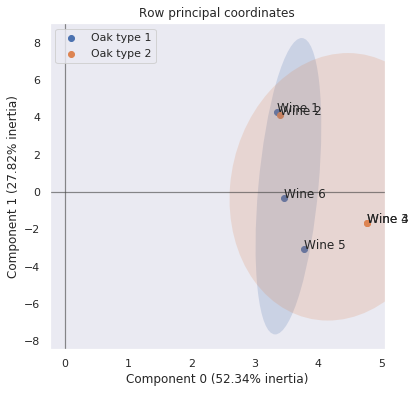

In [51]:
ax = famd.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
)
ax.get_figure().savefig('famd_row_coordinates.svg')

### Assignment Part 2: Travel Review Ratings Data Set

Abstract: Google reviews on attractions from 24 categories across Europe are considered. 
    Google user rating ranges from 1 to 5 and average user rating per category is calculated.

Data Set Information:

This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#
    
Step 4 is your primary task.

1) Download the Google Travel Reviews Ratings Data Set

2) Drop the 'User', and 'Unnamed: 25' columns

3) Drop any na rows 

**4) Use the Prince factor analysis library to perform MCA**

5) List the top 2 components

6) Plot the top 2 components

7) List the MCA eigenvalues_, total_inertia_, and explained_inertia_

8) From the plot (6) and calculations (7) record your observations.
    

In [52]:
import pandas as pd

df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.000000,0.000000,3.630000,3.650000,5.000000,2.920000,5.000000,2.350000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
1,User 2,0.000000,0.000000,3.630000,3.650000,5.000000,2.920000,5.000000,2.640000,2.330000,2.650000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
2,User 3,0.000000,0.000000,3.630000,3.630000,5.000000,2.920000,5.000000,2.640000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
3,User 4,0.000000,0.500000,3.630000,3.630000,5.000000,2.920000,5.000000,2.350000,2.330000,2.640000,1.73,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
4,User 5,0.000000,0.000000,3.630000,3.630000,5.000000,2.920000,5.000000,2.640000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,nan


In [53]:
df.shape

(5456, 26)

In [54]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [55]:
df = df.drop(['User','Unnamed: 25'], axis=1)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.000000,0.000000,3.630000,3.650000,5.000000,2.920000,5.000000,2.350000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,3.630000,3.650000,5.000000,2.920000,5.000000,2.640000,2.330000,2.650000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,3.630000,3.630000,5.000000,2.920000,5.000000,2.640000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.500000,3.630000,3.630000,5.000000,2.920000,5.000000,2.350000,2.330000,2.640000,1.73,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,3.630000,3.630000,5.000000,2.920000,5.000000,2.640000,2.330000,2.640000,1.7,1.690000,1.700000,1.720000,1.740000,0.590000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
df.shape

(5456, 24)

In [0]:
df = df.dropna()

In [59]:
df.shape

(5454, 24)

In [0]:
#### Instantiate a `prince` object and fit the data in `df` dataframe

Use the following parmaeters:

```
n_components=2
n_iter=3
copy=True
engine='auto'
```

In [0]:
import warnings
warnings.filterwarnings('ignore')

import prince
mca = prince.MCA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
mca = mca.fit(df)

In [61]:
mca.column_coordinates(df)

,0,1
Category 1_0.0,-0.354069,-1.890559
Category 1_0.5,-0.246134,-1.523444
Category 1_0.51,-0.170815,-1.538390
Category 1_0.52,-0.184619,-1.446332
Category 1_0.53,-0.130677,-1.380084
...,...,...
Category 24_4.84,1.881996,-0.459049
Category 24_4.85,1.625384,-0.572900
Category 24_4.86,1.330032,-0.229889
Category 24_4.87,1.709191,-0.785900


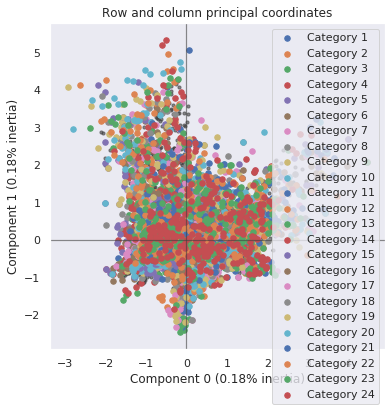

In [62]:
ax = mca.plot_coordinates(
     X=df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
)
ax.get_figure().savefig('mca_coordinates.svg')

Percentage of variance explained by an Eigenvector is also referred as its inertia.

In [63]:
mca.eigenvalues_

[0.5134880869685479, 0.49579583745159617]

In [64]:
mca.total_inertia_

282.6666666666667

In [65]:
mca.explained_inertia_

[0.0018165852133321268, 0.0017539947079655523]

In [66]:
The 

NameError: ignored